In [1]:
import requests
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AMBUJACEM.BSE&outputsize=full&apikey=1X1KKRX3SQO7R688'
r = requests.get(url)
data = r.json()
df = pd.DataFrame(data["Time Series (Daily)"]).T
df.columns = ["Open", "High", "Low", "Close", "Volume"]
df.index = pd.to_datetime(df.index)
df = df.astype(float)

In [3]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=ULTRACEMCO.BSE&outputsize=full&apikey=1X1KKRX3SQO7R688'
r = requests.get(url)
data1 = r.json()
df1 = pd.DataFrame(data1["Time Series (Daily)"]).T
df1.columns = ["Open", "High", "Low", "Close", "Volume"]
df1.index = pd.to_datetime(df1.index)
df1 = df1.astype(float)

In [4]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=ACC.BSE&outputsize=full&apikey=1X1KKRX3SQO7R688'
r = requests.get(url)
data2 = r.json()
df2 = pd.DataFrame(data2["Time Series (Daily)"]).T
df2.columns = ["Open", "High", "Low", "Close", "Volume"]
df2.index = pd.to_datetime(df2.index)
df2 = df2.astype(float)

In [5]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=JKCEMENT.BSE&outputsize=full&apikey=1X1KKRX3SQO7R688'
r = requests.get(url)
data3 = r.json()
df3 = pd.DataFrame(data3["Time Series (Daily)"]).T
df3.columns = ["Open", "High", "Low", "Close", "Volume"]
df3.index = pd.to_datetime(df3.index)
df3 = df3.astype(float)

In [6]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=SHREECEM.BSE&outputsize=full&apikey=1X1KKRX3SQO7R688'
r = requests.get(url)
data4 = r.json()
df4 = pd.DataFrame(data4["Time Series (Daily)"]).T
df4.columns = ["Open", "High", "Low", "Close", "Volume"]
df4.index = pd.to_datetime(df4.index)
df4 = df4.astype(float)

In [7]:
#taking last 6 months data for analysis
cutoff_date = datetime.now() - pd.DateOffset(months=6)

# Filtering each DataFrame to include only the last 6 months data
df = df[df.index >= cutoff_date]
df1 = df1[df1.index >= cutoff_date]
df2 = df2[df2.index >= cutoff_date]
df3 = df3[df3.index >= cutoff_date]
df4 = df4[df4.index >= cutoff_date]

# Combining filtered data into a single DataFrame
all_dfs = [df,df1,df2, df3, df4]
combined_data = pd.concat(all_dfs, keys=["Ambuja cement","UltraTech Cement","Acc","JK Cement", "Shree Cement"], names=["Company", "Date"])

In [8]:
combined_data

Open      High       Low     Close    Volume
Company       Date                                                        
Ambuja cement 2025-07-30    610.60    620.20    610.00    618.30  104128.0
              2025-07-29    614.85    614.85    602.40    610.05  215867.0
              2025-07-28    610.30    619.80    606.05    611.50  122065.0
              2025-07-25    618.95    618.95    609.00    613.35  171599.0
              2025-07-24    619.70    623.20    616.25    620.15  121603.0
...                            ...       ...       ...       ...       ...
Shree Cement  2025-02-07  27992.80  28419.20  27900.00  28262.10     405.0
              2025-02-06  28129.95  28350.00  27747.00  27812.15     247.0
              2025-02-05  28025.95  28560.00  27792.10  28397.55     852.0
              2025-02-04  27727.85  28026.00  27355.00  27963.75     570.0
              2025-02-03  26852.10  27677.25  26846.80  27520.50     786.0

[606 rows x 5 columns]

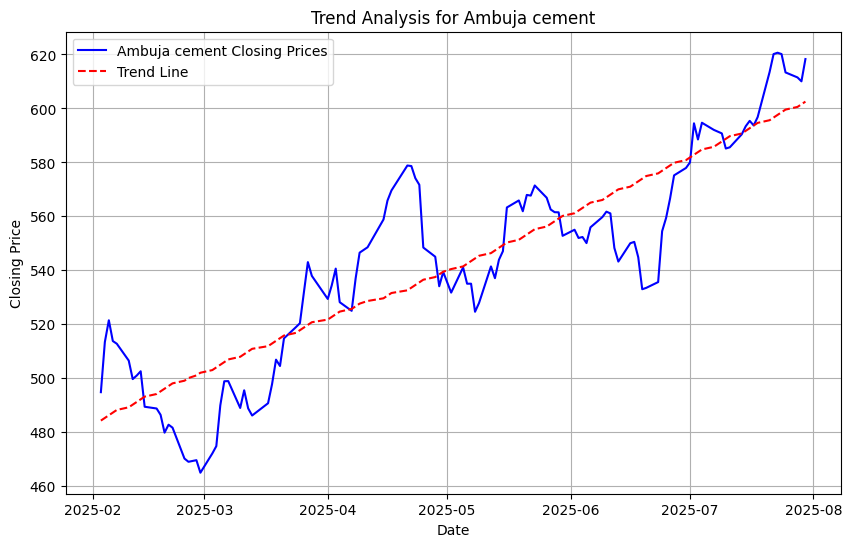

Ambuja cement: Slope = 0.98508


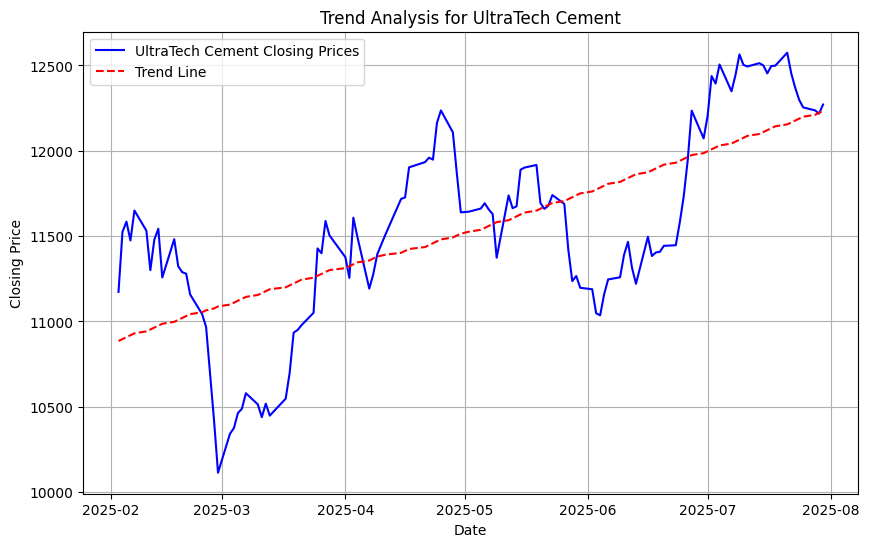

UltraTech Cement: Slope = 11.22848


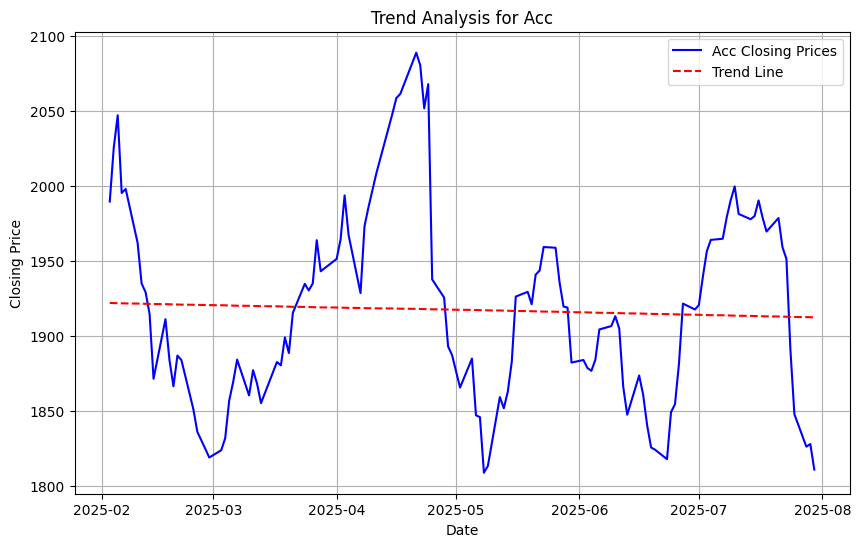

Acc: Slope = -0.07994


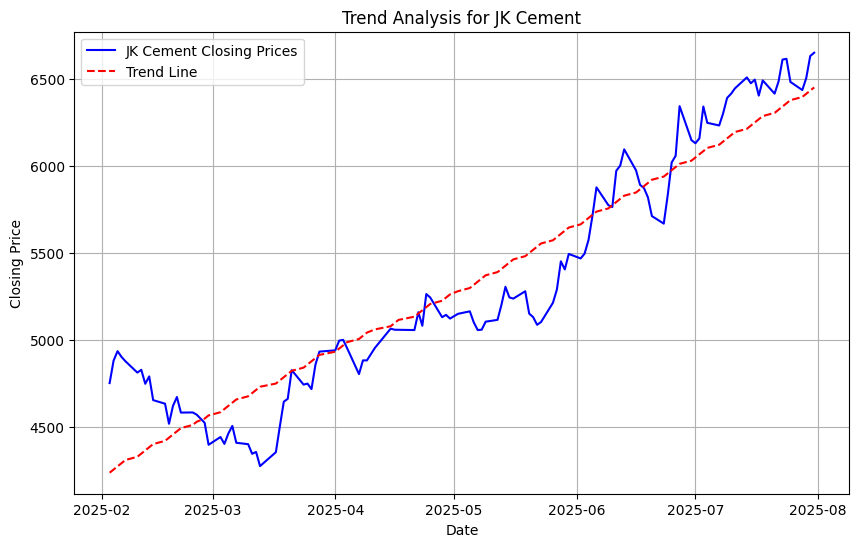

JK Cement: Slope = 18.32557


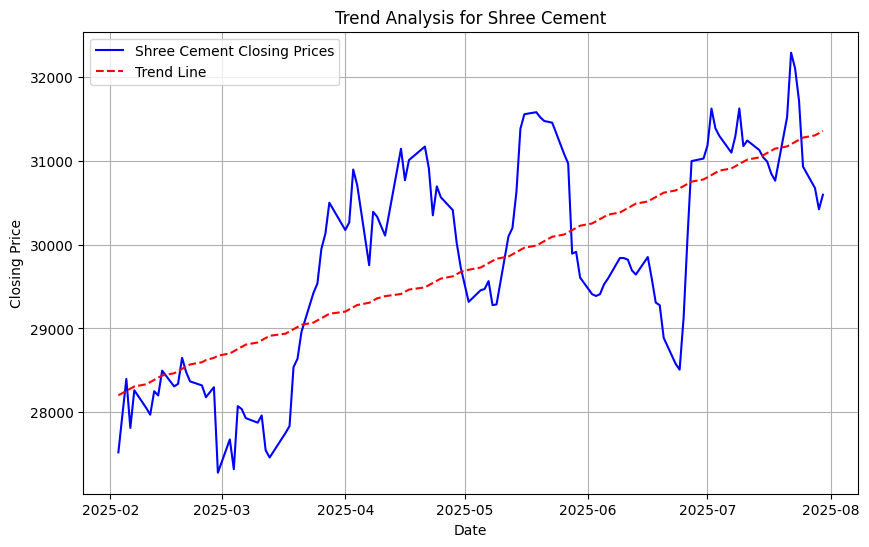

Shree Cement: Slope = 26.30789
Individual Company Trends:
Ambuja cement: Upward trend (Slope = 0.98508)
UltraTech Cement: Upward trend (Slope = 11.22848)
Acc: Downward trend (Slope = -0.07994)
JK Cement: Upward trend (Slope = 18.32557)
Shree Cement: Upward trend (Slope = 26.30789)


In [9]:
# Function to perform trend analysis[Linear Regression analysis] for individual companies
def individual_trend_analysis(data):
    slopes = {}
    companies = data.index.get_level_values('Company').unique()

    for company in companies:
        company_data = data.xs(company, level='Company').copy()

        # Ensuring data is sorted in ascending order by date
        company_data = company_data.sort_index()

        # Add numeric index for regression
        company_data['DateIndex'] = np.arange(len(company_data))
        X = company_data['DateIndex'].values.reshape(-1, 1)  # Independent variable
        y = company_data['Close'].values.reshape(-1, 1)  # Dependent variable

        # Linear Regression
        model = LinearRegression()
        model.fit(X, y)
        slope = model.coef_[0][0]  # Extracting the slope

        # Add trendline to the DataFrame
        company_data['TrendLine'] = model.predict(X)

        # Plot
        plt.figure(figsize=(10, 6))
        plt.plot(company_data.index, company_data['Close'], label=f"{company} Closing Prices", color='blue')
        plt.plot(company_data.index, company_data['TrendLine'], label="Trend Line", color='red', linestyle='--')
        plt.title(f"Trend Analysis for {company}")
        plt.xlabel("Date")
        plt.ylabel("Closing Price")
        plt.legend()
        plt.grid()
        plt.show()

        slopes[company] = slope
        print(f"{company}: Slope = {slope:.5f}")

    return slopes

# Performing the analysis
slopes = individual_trend_analysis(combined_data)

# Displaying results
print("Individual Company Trends:")
for company, slope in slopes.items():
    trend = "Downward" if slope < 0 else "Upward"
    print(f"{company}: {trend} trend (Slope = {slope:.5f})")

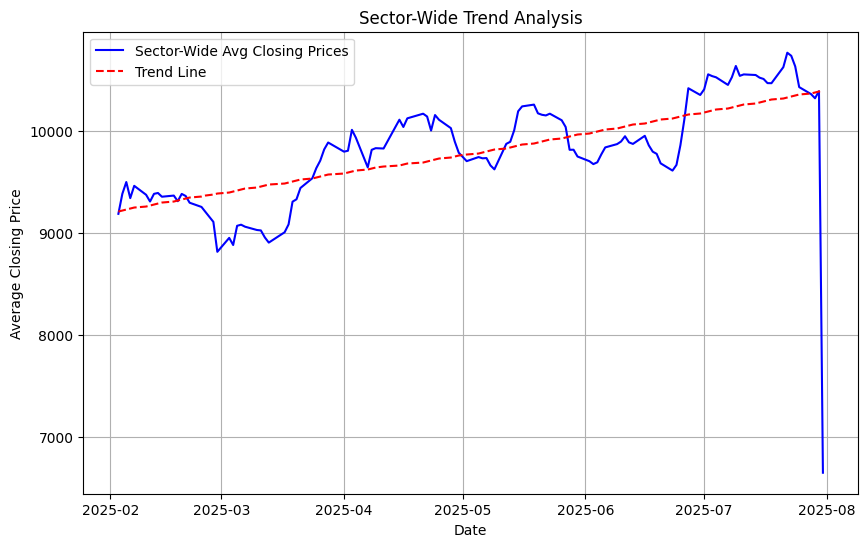

Sector-Wide Trend: Upward trend (Slope = 9.79105)


In [10]:
# Calculate sector-wide average closing price
sector_avg = combined_data.groupby('Date')['Close'].mean()

# Preparing data for regression
sector_avg_df = sector_avg.reset_index()
sector_avg_df['DateIndex'] = np.arange(len(sector_avg_df))
X_sector = sector_avg_df['DateIndex'].values.reshape(-1, 1)
y_sector = sector_avg_df['Close'].values.reshape(-1, 1)

# Linear Regression
sector_model = LinearRegression()
sector_model.fit(X_sector, y_sector)
sector_slope = sector_model.coef_[0][0]

# Adding trendline to the DataFrame
sector_avg_df['TrendLine'] = sector_model.predict(X_sector)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sector_avg_df['Date'], sector_avg_df['Close'], label="Sector-Wide Avg Closing Prices", color='blue')
plt.plot(sector_avg_df['Date'], sector_avg_df['TrendLine'], label="Trend Line", color='red', linestyle='--')
plt.title("Sector-Wide Trend Analysis")
plt.xlabel("Date")
plt.ylabel("Average Closing Price")
plt.legend()
plt.grid()
plt.show()

# Displaying sector trend
sector_trend = "Downward" if sector_slope < 0 else "Upward"
print(f"Sector-Wide Trend: {sector_trend} trend (Slope = {sector_slope:.5f})")